In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../data_processing/')
import matplotlib.cm as cm
from feature import Feature
from scipy.signal import periodogram
from scipy.signal import savgol_filter

In [2]:
def plot_feature(feature, indices=None, sample_size=150000):

    plt.figure(figsize=(15, 5))
    if indices is None:
        plt.plot(feature, 'k')
    else:
        start, stop, step = indices
        data_pcs = [feature.values[i:i + step] for i in range(max(step, start), stop, step)]
        time_pcs = [list(range(i, i + step)) for i in range(max(step, start), stop, step)]

        for i, (data_sample, time_sample) in enumerate(zip(data_pcs, time_pcs)):
            if i%2:
                plt.plot(time_sample, data_sample, 'r')
            else:
                plt.plot(time_sample, data_sample, 'k')
    plt.grid(True)
    plt.show()
    
def simple_plot(y, x=None, title=None, ylim=None):
    plt.figure(figsize=(15, 5))
    if x is not None:
        plt.plot(x, y, 'r')
    else:
        plt.plot(y, 'r')
    if title is not None:
        plt.title(title)
    if ylim is not None:
        plt.ylim(ylim)
    plt.grid(True)
    plt.show()

In [3]:
df = pd.read_hdf('../../data/e2/valid_data.h5', key='table')

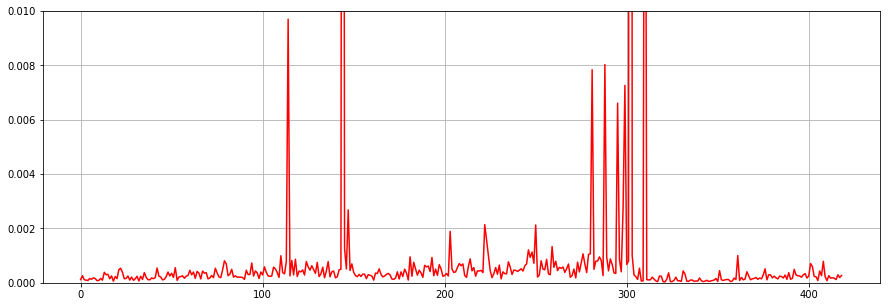

In [6]:
chunk_size = 150000
results = []
for i in range(0, df.shape[0] - chunk_size, chunk_size):
    freqs, res = periodogram(df[i:i+chunk_size].values.reshape(-1,), fs=4e6)
    res_filtered = savgol_filter(res, window_length=101, polyorder=2)
    results.append(max(res_filtered[:int(50e3)]))
simple_plot(results, ylim=[0, 0.01])

In [ ]:
freqs, res = periodogram(df[:int(150e3)].values.reshape(-1,), fs=4e6)
res_filtered = savgol_filter(res, window_length=1001, polyorder=2)

In [ ]:
%%time
max_filter_psd = Feature(df['s'], '../../data/')\
.w_psd(window_size=150000, window_stride=1000)\
.r_savgol_filter(window_length=1001, polyorder=2)\
.w_max(window_size=150000, window_stride=1000)\
.data

In [ ]:
signal_dec = Feature(df['s'], '../../data/')\
.w_last_elem(window_size=150000, window_stride=150000)\
.data

In [8]:
ttf_dec = Feature(df['ttf'], '../../data/')\
.w_last_elem(window_size=150000, window_stride=150000)\
.data

w_last_elem(self, window_size=150000, window_stride=150000): 100%|██████████| 420/420 [00:00<00:00, 14433.96it/s]
	 window decorator for w_last_elem: 
	 - window size: 150000
	 - window stride: 150000


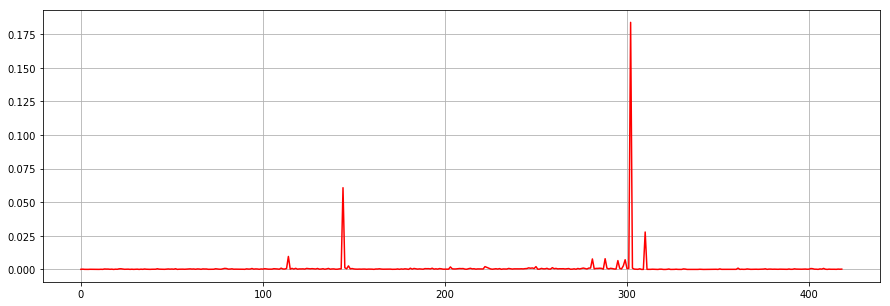

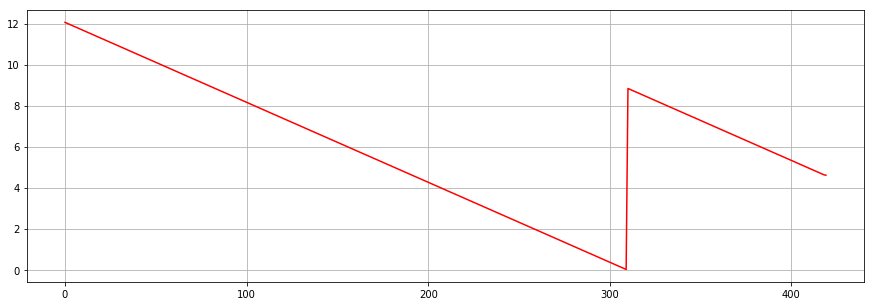

In [9]:
simple_plot(results)
simple_plot(ttf_dec)